In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# data
df_to_eda = pd.read_csv("data/curated/df_to_eda.csv")

In [21]:
# how much data we have on school_step
df_to_eda["school_step"].value_counts()

Médio & Pré-Vestibular    35307
Fundamental II            33390
Fundamental I             18144
Name: school_step, dtype: int64

Como podemos ver aqui, existe uma quantidade bem interessante entre as 3 classes que iremos prever. No FUND-I temos um pouco mais da metade das outras duas classes, mas acreditamos que não será um problema.

# Tamanho das sentenças

As questões vão de 1 à 65532 caracteres por questão
O valor mediano e médio de caracteres por questão é de 215 e de 385, respectivamente.


<AxesSubplot:xlabel='question_c2', ylabel='Count'>

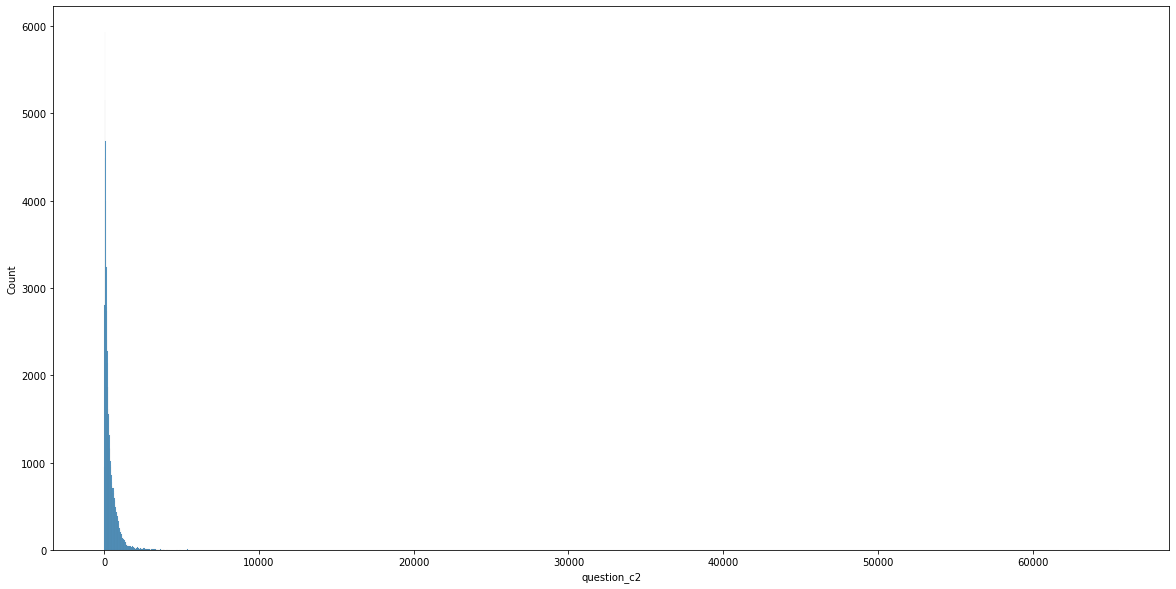

In [23]:
max = df_to_eda['question_c2'].str.len().max()
min = df_to_eda['question_c2'].str.len().min()
median = df_to_eda['question_c2'].str.len().median()
mean = df_to_eda['question_c2'].str.len().mean()

print('As questões vão de %d à %d caracteres por questão' % (min, max))
print('O valor mediano e médio de caracteres por questão é de %d e de %d, respectivamente.' %
(median, mean))

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(df_to_eda['question_c2'].str.len(), ax = ax)

Curiosamente temos muitas sentenças de tamanho 1. Provavelmente esses itens não representam nada e precisam ser excluídos.

In [29]:
df_to_eda['question_c2'].astype("str").apply(len).sort_values()

69952        1
76497        1
75251        1
46892        1
50419        1
         ...  
58817    64505
69735    65532
42658    65532
23050    65532
79472    65532
Name: question_c2, Length: 86841, dtype: int64

In [32]:
# looking at those items with sentence length of 1
df_to_eda[df_to_eda["question_c2"].astype("str").apply(len) == 1]

,question_c2,bulletType,school_step
1131,4,4,Fundamental II
1665,,2,Médio & Pré-Vestibular
1752,5,4,Médio & Pré-Vestibular
3033,8,4,Fundamental II
4107,:,2,Médio & Pré-Vestibular
...,...,...,...
80836,:,2,Médio & Pré-Vestibular
83017,3,4,Fundamental II
84419,,4,Fundamental I
84427,,2,Médio & Pré-Vestibular


In [33]:
# filtering length 1 sentence size items
df_c1 = df_to_eda[df_to_eda["question_c2"].astype("str").apply(len) != 1]


In [35]:
# let's check the length of these sentences again
df_c1['question_c2'].astype("str").apply(len).sort_values()


73408        2
85664        2
3769         2
20474        2
57918        2
         ...  
58817    64505
79472    65532
69735    65532
42658    65532
23050    65532
Name: question_c2, Length: 86752, dtype: int64

In [41]:
df_c1["sentence_len"] = df_c1["question_c2"].astype("str").apply(len)

/tmp/ipykernel_21864/3120791506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1["sentence_len"] = df_c1["question_c2"].astype("str").apply(len)


In [42]:
df_c1

,question_c2,bulletType,school_step,sentence_len
0,Com base em seus conhecimentos sobre o composi...,2,Fundamental II,437
1,"“Achar um número que, somado com 2 seja igual ...",2,Fundamental II,106
2,2. Complete os espaços abaixo com os artigos d...,4,Fundamental II,455
3,A chuva ácida é um fenômeno provocado pela pol...,2,Fundamental II,119
4,Anexe nesse espaço uma foto da sua ilustração.,4,Fundamental I,46
...,...,...,...,...
86836,Leia a reportagem e responda a questão:Sobre a...,2,Fundamental I,120
86837,"Para responder à questão, leia o trecho do con...",2,Médio & Pré-Vestibular,2046
86838,Em que pais surgiu o skate?,2,Fundamental II,27
86839,Os machos e fêmeas de mosquitos do gênero Aede...,2,Fundamental II,567
